# Project 1

Nilanjan Debnath

Stock Symbol of interest: Apple

Ticker symbol: AAPL


Downloading talib compatible with python 3.1

Takes like 7-8 mins to install when you run the cell

In [ ]:
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz

!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   1001      0 --:--:-- --:--:-- --:--:--  1002
100   363  100   363    0     0    497      0 --:--:-- --:--:-- --:--:--     0
100 1299k  100 1299k    0     0   790k      0  0:00:01  0:00:01 --:--:--  790k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

Importing yfinance, pandas, talib.
Using the stock ticker for Apple.
Start date is 700 days before today.
(reason for 700 instead of the max 730 is so that if this program is run within 1 month, it'll still be able to get the data)

We examine Apple Inc. stock data from August 16, 2022, to July 15, 2024, using data recorded at one-hour intervals. This date range is selected because Yahoo Finance offers hourly stock data up to two years in the past

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns
# Define the stock ticker

ticker = 'AAPL'

# Define the start and end dates
start_date = '2022-08-16'
end_date = '2024-07-15'

# Fetch historical data for the specified date range
aapl_data = yf.download(ticker, start=start_date, end=end_date, interval='1h')

# Display the first few rows of the DataFrame
print(aapl_data.head(10))

[*********************100%%**********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2022-08-16 09:30:00-04:00  172.779999  172.869995  171.661804  172.110001   
2022-08-16 10:30:00-04:00  172.115005  173.300003  171.770004  173.160004   
2022-08-16 11:30:00-04:00  173.160004  173.490005  172.780106  172.975006   
2022-08-16 12:30:00-04:00  172.970001  173.139999  172.580002  172.949997   
2022-08-16 13:30:00-04:00  172.949997  173.710007  172.880005  173.240005   
2022-08-16 14:30:00-04:00  173.235001  173.240097  171.830002  172.615005   
2022-08-16 15:30:00-04:00  172.619995  173.270004  172.600006  173.029999   
2022-08-17 09:30:00-04:00  173.250000  174.449997  173.009995  174.039993   
2022-08-17 10:30:00-04:00  174.050003  174.089996  173.080002  173.789993   
2022-08-17 11:30:00-04:00  173.789200  173.994995  173.080002  173.800003   

                            Adj Close    Volume  
Datetime                 

In addition, we include stock data for Microsoft, Google, Meta, and ExxonMobil. The rationale for this approach is to investigate whether stock prices are influenced by the stock prices of other companies within the same industry. ExxonMobil is included to assess whether stock prices are impacted by stocks from different industries. We use the same date range and one-hour interval for this data as well.

In [ ]:
tickers = ['MSFT', 'GOOGL', 'META', 'XOM']

# Define the start and end dates
start_date = '2022-08-16'
end_date = '2024-07-15'

# Fetch historical data for the specified date range
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date, interval='1h')

# Display the first few rows of the DataFrame for each stock
for ticker in tickers:
    print(f"First few rows of {ticker} data:\n", data[ticker].head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

First few rows of MSFT data:
                                  Open        High         Low       Close  \
Datetime                                                                    
2022-08-16 09:30:00-04:00  291.989990  292.880005  290.865112  291.399994   
2022-08-16 10:30:00-04:00  291.350006  292.429901  290.420013  292.130005   
2022-08-16 11:30:00-04:00  292.114990  293.489990  291.989990  292.339996   
2022-08-16 12:30:00-04:00  292.339996  292.970001  292.029999  292.809998   
2022-08-16 13:30:00-04:00  292.829987  294.040009  292.670013  293.510010   

                            Adj Close   Volume  
Datetime                                        
2022-08-16 09:30:00-04:00  291.399994  4004356  
2022-08-16 10:30:00-04:00  292.130005  2186690  
2022-08-16 11:30:00-04:00  292.339996  1585045  
2022-08-16 12:30:00-04:00  292.809998   933514  
2022-08-16 13:30:00-04:00  293.510010  1229914  
First few rows of GOOGL data:
                                  Open        High       

This data represents insider trading information sourced from the SEC website. Due to difficulties in properly parsing the XML format, we utilized Optical Character Recognition (OCR) to convert the images into CSV files. The content has been uploaded to a public GitHub repository, which has been cloned to ensure accessibility for everyone.
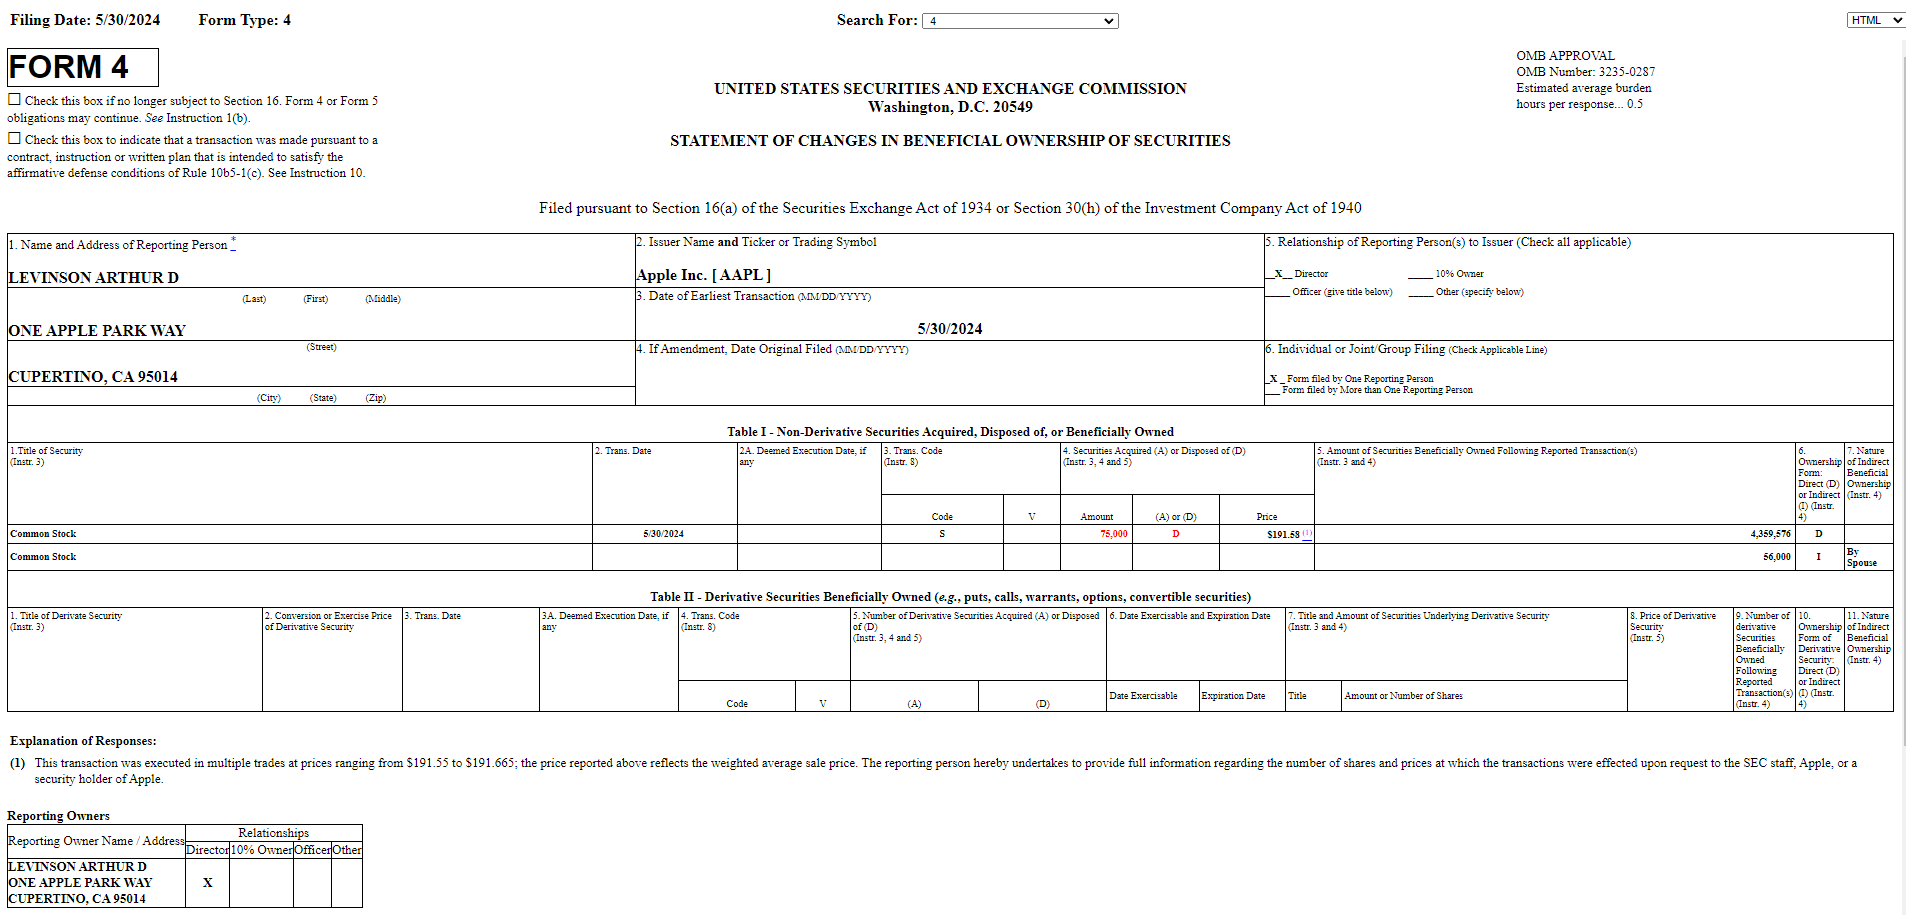
The dataset includes information on the quantity of stocks sold by individuals in leadership positions within the company. An example of Form 4 is provided

In [ ]:
!git clone https://github.com/Nilanjan96/Project_1_AML

df1 = pd.read_csv("Project_1_AML/1.csv")
df2 = pd.read_csv("Project_1_AML/2.csv")
df3 = pd.read_csv("Project_1_AML/3.csv")

combined_df = pd.concat([df1, df2, df3], ignore_index=True)

We chose to focus on shares sold because stocks acquired by individuals in high positions are often awarded, and the purchase price is typically not listed.

In [ ]:
combined_df

We need to integrate the insider trading data with the Apple stock data. Therefore, we adjust the datetime format to match that of the Apple dataset.

In [ ]:
from datetime import datetime, timedelta

combined_df['Datetime'] = pd.to_datetime(combined_df['Reported DateTime']).dt.tz_localize('America/New_York')

# Display the adjusted datetime in stock sales data
print("\nAdjusted Stock Sales Data:")
print(combined_df.head())

We observe that all trades occur after the stock market closes at 4:30 PM. Consequently, we align the insider trading data with the morning of the following day when trading resumes.

In [ ]:
def adjust_datetime(row):
    if row.hour >= 16:
        next_trading_day = row + timedelta(days=1)
        return datetime(next_trading_day.year, next_trading_day.month, next_trading_day.day, 9, 30)
    else:
        return row

# Apply the adjustment to the stock_sales dataset
combined_df['Adjusted_Datetime'] = combined_df['Datetime'].apply(adjust_datetime).dt.tz_localize('America/New_York')


In [ ]:
combined_df

Cleaning the insider trading data: On some days, multiple stock sales occur between the market's closing and opening times. We consolidate these entries by summing the corresponding rows.

In [ ]:
grouped_df = combined_df.groupby('Adjusted_Datetime').agg({'Shares Traded': 'sum'}).reset_index()
grouped_df

In [ ]:
aapl_data = aapl_data.reset_index()
merged_data = pd.merge(aapl_data, grouped_df[['Adjusted_Datetime', 'Shares Traded']],
                       left_on='Datetime', right_on='Adjusted_Datetime', how='left')

# Fill NaN values with 0 for the Number of Stocks Sold
merged_data['Shares Traded'].fillna(0, inplace=True)

# Drop the adjusted datetime column as it's no longer needed
merged_data.drop(columns=['Adjusted_Datetime'], inplace=True)

merged_data = merged_data.set_index('Datetime')
# Display the merged dataset
print("\nMerged Dataset:")
print(merged_data.head())

In [ ]:
merged_data.rename(columns={'Shares Traded': 'Insider Stock Sold'}, inplace=True)
merged_data

We now integrate the Apple stock data and insider trading data with the stock data from Microsoft, Google, Meta, and ExxonMobil. To achieve this, we align the rows based on the datetime index.

In [ ]:
for i in tickers:
  data[i].columns = [i+'_' + col for col in data[i].columns]


merged_data = merged_data.reset_index()
data['MSFT'] = data['MSFT'].reset_index()
data['GOOGL'] = data['GOOGL'].reset_index()
data['META'] = data['META'].reset_index()
data['XOM'] = data['XOM'].reset_index()

stock_data = merged_data
stock_data = pd.merge(stock_data, data['MSFT'], on='Datetime', how='left', suffixes=('', '_drop'))
stock_data = pd.merge(stock_data, data['GOOGL'], on='Datetime', how='left', suffixes=('', '_drop'))
stock_data = pd.merge(stock_data, data['META'], on='Datetime', how='left', suffixes=('', '_drop'))
stock_data = pd.merge(stock_data, data['XOM'], on='Datetime', how='left', suffixes=('', '_drop'))

stock_data = stock_data.set_index('Datetime')

stock_data

Now we calculate technical indicators:- \\

Moving Averages: A moving average smooths out price data by creating a constantly updated average price over a specific time period.

MACD (Moving Average Convergence Divergence): MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security price.

RSI (Relative Strength Index): RSI is a momentum oscillator that measures the speed and change of price movements, indicating overbought or oversold conditions.

Bollinger Bands: Bollinger Bands are volatility bands placed above and below a moving average, indicating overbought and oversold levels relative to a moving average.

Additionally we also add these to the dataset

In [ ]:
# Calculate Simple Moving Average (SMA)
stock_data['SMA_50'] = ta.SMA(stock_data['Close'], timeperiod=50)
stock_data['SMA_200'] = ta.SMA(stock_data['Close'], timeperiod=200)

# Calculate Exponential Moving Average (EMA)
stock_data['EMA_50'] = ta.EMA(stock_data['Close'], timeperiod=50)
stock_data['EMA_200'] = ta.EMA(stock_data['Close'], timeperiod=200)

# Calculate MACD
stock_data['MACD'], stock_data['MACD_Signal'], stock_data['MACD_Hist'] = ta.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Calculate RSI
stock_data['RSI'] = ta.RSI(stock_data['Close'], timeperiod=14)

# Calculate Bollinger Bands
stock_data['Upper_BB'], stock_data['Middle_BB'], stock_data['Lower_BB'] = ta.BBANDS(stock_data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

In [ ]:
stock_data

We will be retrieving **Economic indicators** now which include interest rates, inflation rates, GDP growth, unemployment rates.

In [ ]:
!pip install pandas_datareader

In [ ]:
from pandas_datareader import data as pdr

In [ ]:
economic_indicators = {
    'Interest Rate': 'FEDFUNDS',  # Federal Funds Rate
    'Inflation Rate': 'CPIAUCSL',  # Consumer Price Index for All Urban Consumers
    'GDP Growth': 'A191RL1Q225SBEA',  # Real GDP
    'Unemployment Rate': 'UNRATE'  # Unemployment Rate
}

# Define the start and end dates
start_date = '2022-06-16'
end_date = '2024-07-15'

# Fetch economic indicator data from FRED
economic_data = {}
for indicator, fred_code in economic_indicators.items():
    economic_data[indicator] = pdr.get_data_fred(fred_code, start=start_date, end=end_date)

economic_data

**Data Cleaning Economic Indicators** \\
In the next cell, we generate the dataset from the dictionary and trim it to the desired timeline. While we have monthly data for interest rates, inflation rates, and unemployment rates, the GDP data is available quarterly. Therefore, we fill the GDP column in three-month increments. For the most recent months where GDP data is unavailable, we use the latest available data.

In [ ]:
interest_rate_df = economic_data['Interest Rate']
inflation_rate_df = economic_data['Inflation Rate']
gdp_growth_df = economic_data['GDP Growth']
unemployment_rate_df = economic_data['Unemployment Rate']

# Filter the data to start from August 2022
interest_rate_df = interest_rate_df.loc['2022-08-01':]
inflation_rate_df = inflation_rate_df.loc['2022-08-01':]
unemployment_rate_df = unemployment_rate_df.loc['2022-08-01':]

# Repeat GDP growth for each month within the quarter
gdp_growth_df = gdp_growth_df.resample('MS').ffill().loc['2022-08-01':]

# Merge dataframes
economic_final = interest_rate_df.join([inflation_rate_df, gdp_growth_df, unemployment_rate_df])
economic_final['A191RL1Q225SBEA'][-5:] = 1.7

economic_final

We now incorporate the economic indicators into the dataset. To achieve this, we follow a similar process as before: converting the datetime format of the economic indicators dataframe to match the datetime format of the stock data, and then aligning them accordingly

In [ ]:
economic_final = economic_final.reset_index()
economic_final['DATE'] = pd.to_datetime(economic_final['DATE']).dt.tz_localize('America/New_York')
stock_data = stock_data.reset_index()

merged_data = stock_data.merge(
    economic_final,
    left_on=stock_data['Datetime'].dt.to_period('M'),
    right_on=economic_final['DATE'].dt.to_period('M'),
    how='left'
)


In [ ]:
merged_data = merged_data.drop(columns=['key_0'])
merged_data = merged_data.ffill()
merged_data = merged_data.drop(['DATE'], axis = 1)
merged_data.set_index('Datetime', inplace= True)

merged_data.rename(columns={'FEDFUNDS': 'Interest Rate'}, inplace=True)
merged_data.rename(columns={'CPIAUCSL': 'Inflation Rate'}, inplace=True)
merged_data.rename(columns={ 'A191RL1Q225SBEA': 'GD'}, inplace=True)
merged_data.rename(columns={'UNRATE': 'Unemployment Rate'}, inplace=True)

In [ ]:
merged_data

# Step 2: Data Preparation

We provide a list of all the variables along with the following information for each variable of the data:

Description of the variable

Data type of the variable

Sample values from the variable

In [ ]:
data = merged_data #using a copy so as to not mess with the original dataframe

descriptions = {
    'Open': 'The opening price of Apple',
    'High': 'The highest price of Apple',
    'Low': 'The lowest price of Apple',
    'Close': 'The closing price of Apple',
    'Adj Close': 'Apple closing price adjusted for stock splits, dividend distributions, and additional shares',
    'Volume': 'Number of Apple shares traded',
    'Insider Stock Sold': 'Amount of Common Stock sold by an insider in Apple',
    'MSFT_Open': 'The opening price for Microsoft',
    'MSFT_High': 'The highest price of Microsoft',
    'MSFT_Low': 'The lowest price of Microsoft',
    'MSFT_Close': 'The closing price of Microsoft',
    'MSFT_Adj Close': 'Microsoft closing price adjusted for stock splits, dividend distributions, and additional shares',
    'MSFT_Volume': 'Number of Microsoft shares traded ',
    'GOOGL_Open': 'The opening price of Google',
    'GOOGL_High': 'The highest price of Google',
    'GOOGL_Low': 'The lowest price of Google ',
    'GOOGL_Close': 'The closing price of Google',
    'GOOGL_Adj Close': 'Google closing price adjusted for stock splits, dividend distributions, and additional shares',
    'GOOGL_Volume': 'Number of Google shares traded',
    'META_Open': 'The opening price of Meta',
    'META_High': 'The highest price of Meta',
    'META_Low': 'The lowest price of Meta',
    'META_Close': 'The closing price of Meta',
    'META_Adj Close': 'Meta closing price adjusted for stock splits, dividend distributions, and additional shares',
    'META_Volume': 'Number of Meta shares traded',
    'XOM_Open': 'Opening price of Exon Mobile',
    'XOM_High': 'The highest price of Exon Mobile',
    'XOM_Low': 'The lowest price of Exon Mobile',
    'XOM_Close': 'The closing price for Exon Mobile ',
    'XOM_Adj Close': 'Exon Mobile closing price adjusted for stock splits, dividend distributions, and additional shares',
    'XOM_Volume': 'Number of Exon Mobile shared traded',
    'SMA_50': 'Apple 50 day simple moving average',
    'SMA_200': 'Apple 200 day simple moving average',
    'EMA_50': 'Apple 50 day exponential moving average',
    'EMA_200': 'Apple 200 day exponential moving average ',
    'MACD': 'Moving Average Convergence Difference',
    'MACD_Signal': '9 period EMA of MACD',
    'MACD_Hist': 'MACD Histogram',
    'RSI': 'Relative Strenght Index',
    'Upper_BB': 'Upper Bollinger Band',
    'Middle_BB': 'Middle Bollinger Band',
    'Lower_BB': 'Lower Bollinger Band',
    'Interest Rate': 'Interst rate at the time',
    'Inflation Rate': 'Inflation rate at the time',
    'GD': 'GDP at the time',
    'Unemployment Rate': 'Unemployment Rate at the time'

    # Add descriptions for all columns
}

# Create an empty list to store the variable information
variable_info = []

# Iterate over each column in the dataset to gather information
for column in data.columns:
    # Get data type
    data_type = data[column].dtype

    # Get sample values (5 sample values)
    sample_values = data[column].dropna().sample(5).tolist() if data[column].notna().sum() >= 5 else data[column].dropna().tolist()

    # Append the initial information to the variable_info list
    variable_info.append({
        'Variable': column,
        'Description': 'To be filled by user',  # Placeholder description
        'Data Type': data_type,
        'Sample Values': sample_values
    })

# Update descriptions in the variable_info list
for entry in variable_info:
    column = entry['Variable']
    entry['Description'] = descriptions.get(column, 'No description available')

# Convert the list to a DataFrame
variable_info_df = pd.DataFrame(variable_info)

# Display the DataFrame
print(variable_info_df)

Since all the variables are numeric, we showcase the number of observations, range, min, max and other basic statistics of the variable

In [ ]:
data

In [ ]:
# Iterate over each column to process numeric variables
for column in data.select_dtypes(include=['number']).columns:
    print(f"\nStatistics for '{column}':")

    # Number of observations
    num_observations = data[column].notna().sum()
    print(f"Number of Observations: {num_observations}")

    # Range
    range_ = data[column].max() - data[column].min()
    print(f"Range: {range_}")

    # Min and Max
    min_value = data[column].min()
    max_value = data[column].max()
    print(f"Min: {min_value}")
    print(f"Max: {max_value}")

    # Mean, Standard Deviation, and Variance
    mean = data[column].mean()
    std_dev = data[column].std()
    variance = data[column].var()
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Variance: {variance}")

    # Mode, Median, Quartiles
    mode = data[column].mode().values
    median = data[column].median()
    quartiles = data[column].quantile([0.25, 0.50, 0.75, 0.95])
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    print(f"Quartiles:\n{quartiles}")

    # Plot Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data[column].dropna(), bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


    #Plot Line Graph
    plt.figure(figsize = (10,5))
    plt.plot(data.index, data[column], label = column, color = 'orange')
    plt.title(f'Line Graph of {column}')
    plt.xlabel(column)
    plt.ylabel('Progression wrt time')
    plt.legend()
    plt.show()

An intriguing aspect of the graphs is the points at which stock prices reach their lowest values. Notably, while many technology stocks experienced significant declines around November 2022, ExxonMobil did not follow this trend. Let’s delve deeper into this phenomenon next.

In [ ]:

plt.figure(figsize=(14, 7))

# Plot each stock's closing prices with different colors
plt.plot(merged_data['Close'], label='Apple Close Price')
plt.plot(merged_data['MSFT_Close'], label='Microsoft Close Price')
plt.plot(merged_data['GOOGL_Close'], label='Google Close Price')
plt.plot(merged_data['META_Close'], label='META Close Price')
plt.plot(merged_data['XOM_Close'], label='Exxon Mobil Close Price')

# Add title and labels
plt.title('Hourly Closing Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Add legend to distinguish between the different stocks
plt.legend()

# Show the plot
plt.show()

We plotted the correlation matrix and observed that while there is a strong positive correlation among stocks within the technology sector, there is a slight negative correlation between technology stocks and ExxonMobil!

In [ ]:
closing_prices = merged_data[['Close', 'MSFT_Close', 'GOOGL_Close', 'META_Close', 'XOM_Close']]

# Compute the correlation matrix
correlation_matrix = closing_prices.corr()

# Display the correlation matrix
print(correlation_matrix)

In [ ]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Data')
plt.show()

The 2022 stock market decline was a significant economic event marked by a global downturn in stock markets, the worst for American indices since 2008, ending three years of gains. In February 2022, the Russian invasion of Ukraine triggered a worldwide financial market sell-off. This decline severely impacted economies globally, with the U.S. S&P 500 peaking in January and beginning a steady decline, culminating in its largest drop since March 2020 in September.

In the U.S., this decline led to a bear market starting on January 3, 2022, and ending on October 22, 2022. By November 2022, the Dow Jones, Nasdaq Composite, and S&P 500 had transitioned into a bull market, while Japan's Nikkei 225 reached its highest level since 1990 by May 2023.

The downturn's causes included lingering financial instability from the COVID-19 pandemic as investors grappled with its long-term economic effects. The Russian invasion of Ukraine exacerbated the situation by raising fears of energy disruptions. Additionally, concerns about a global recession further impacted markets. On June 13, 2022, the MSCI ACWI index entered a bear market, dropping 21% from its mid-November peak.

In the U.S., the S&P 500 peak at 4,796 on January 3 gave way to a steady decline due to inflation and the Federal Reserve interest rate hikes, which undermined investor confidence. The U.S. GDP shrank by 1.6% in the first quarter of 2022, intensifying recession fears and contributing to the equity price decline. By June 16, the S&P 500 had fallen 23.55%, the DJIA 18.78%, and the Nasdaq Composite 33.70%.

On September 13, 2022, the S&P 500 saw its largest single-day drop since June 2020. Despite this, ESG investment funds in the U.S. experienced inflows of $3.1 billion, while non-ESG funds saw outflows of 370 billion dollars.

China stock market also suffered due to concerns over its Zero-COVID strategy and regulatory actions, with Alibaba's share price dropping from over \$ 300 in mid-2020 to below \$ 100 by June 2022. Emerging markets experienced severe sell-offs, with the JPMorgan EMBI Global Diversified returning -15% in 2022. ETFs like VWO, IEMG, and EEM also fell over 15% since the start of 2022.

Cryptocurrencies, particularly Bitcoin and Ethereum, plummeted as part of the broader decline in risky assets, with Bitcoin price dropping 59% during this period and 72% from its November 2021 peak.

https://en.wikipedia.org/wiki/2022_stock_market_decline

We download and compare stock prices of S&P500, Apple, Bitcoin for 10 years to assess the slump

In [ ]:
sp500_ticker = "^GSPC"
bitcoin_ticker = "BTC-USD"
aapl_ticker = 'AAPL'

end_date = datetime.now()
start_date = end_date - timedelta(days=10*365)

aapl_data = yf.download(aapl_ticker, start=start_date, end=end_date)
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)
bitcoin_data = yf.download(bitcoin_ticker, start=start_date, end=end_date)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(aapl_data.index, aapl_data['Close'], label="Apple", color='orange')
plt.title('Apple Price (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(sp500_data.index, sp500_data['Close'], label="S&P 500")
plt.title('S&P 500 Price (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the Bitcoin data
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_data.index, bitcoin_data['Close'], label="Bitcoin", color='orange')
plt.title('Bitcoin Price (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

However on the other hand, we see that Exxonmobile did really well during this stock market decline. Which is why we see in our data of the last 2 years, exxonmobile having a negative correlation to the tech stocks.

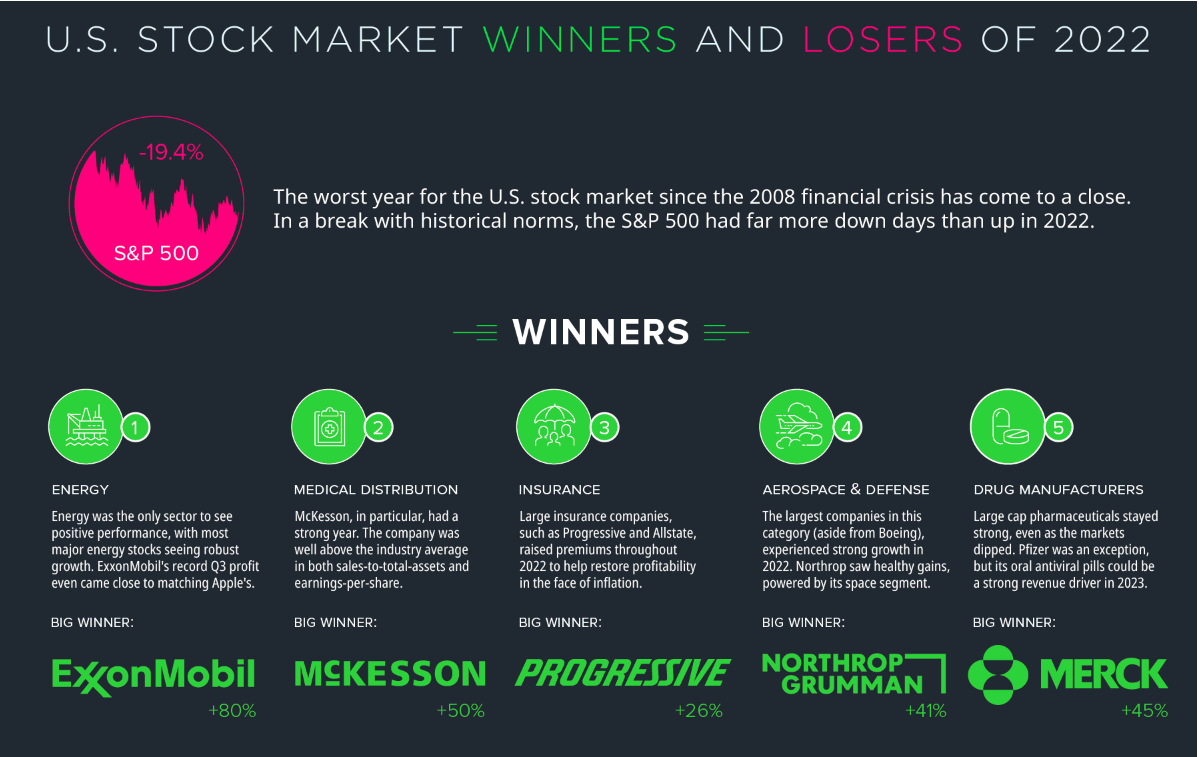

# Data Cleaning

Let us try to find outliers. We use the interquartile range and get the values which are outside the range we specified.

In [ ]:
data = merged_data  # Make a copy of the data

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for each numerical column
numerical_columns = data.select_dtypes(include=[np.number]).columns

outliers = []
for column in numerical_columns:
    outliers.append(detect_outliers_iqr(data, column))

# Concatenate the list of outliers DataFrames
outliers_df = pd.concat(outliers)

# Handle outliers (example: removing them)
data_no_outliers = data.copy()
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)]

# Display the first few rows of the cleaned data
print(data_no_outliers.head())

Stocks tumbled Wednesday, 2nd Nov 2022 after Federal Reserve Chair Jerome Powell said inflation was still too high and indicated that the central bank has more rate hiking ahead

https://www.cnbc.com/2022/11/01/stock-market-futures-open-to-close-news.html

We randomly choose a few rows of the outliers get the date of 13th Feb 2023. We link the news for that day on what happened which caused the stock to behave as an outlier.

In [ ]:
rows_to_display = data_no_outliers.iloc[330:335]
print(rows_to_display)

Hot Inflation Print Sparks Stock and Bond Sell-Off

https://investopedia.com/dow-jones-today-02132024-8576604

We will not engage in outlier handling, as outlying stock prices provide valuable information, indicating significant events that caused unusual stock behavior during those periods.

Detecting missing data. As expected missing data are from the technical indicators. We can handle them by dropping the datapoints containing the rows with missing values. However since here we are not doing any machine learning, we are keeping those values.

In [ ]:
data = merged_data.copy()  # Replace with your actual dataframe name

# Display the number of missing values for each column
print("Missing values before treatment:")
print(data.isnull().sum())


In [ ]:
merged_data_clean = merged_data.dropna

Now we identify and handle highly correlated variables. As we can see, for a singular stock, the Open, High, Low, Close, Adj Close are very highly correlated. We hence can use only one of these.

In [ ]:
correlation_matrix = merged_data[['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Apple Stock Variables')
plt.show()

Doing the same for the technical indicators:-

In [ ]:
correlation_matrix = merged_data[["SMA_50","SMA_200","EMA_50","EMA_200","MACD","MACD_Signal","MACD_Hist","RSI","Upper_BB","Middle_BB","Lower_BB"]].corr()
# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for technical indicators')
plt.show()

We can see that ther is very high correlation between SMA_50, SMA_200, EMA_50 and EMA_200, We use the EMA_50 amongst these. MACD and MACD_Hist among MACD, MACD_Signal and RSI. And finally we use Middle_BB amongst the Bollinger Bands

In [ ]:
merged_data.head()

Finally we try the correlation between the economic indicators. We can see that there is a quite high correlation between inflation and unemployment rate which makes sense

In [ ]:
correlation_matrix = merged_data[["Interest Rate", "Inflation Rate","GD","Unemployment Rate"
                                ]].corr()
# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for economic indicators')
plt.show()

We now find the correlation between the columns that we choose in the last few code blocks

In [ ]:
correlation_matrix = merged_data[["Close","EMA_50","MACD","Insider Stock Sold","Volume", "Interest Rate", "Inflation Rate","GD","Unemployment Rate"
                                ]].corr()
# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Next we provide the correlation matrix for the entire dataset

In [ ]:
correlation_matrix = merged_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Insider Stock Sold', 'MSFT_Open', 'MSFT_High', 'MSFT_Low',
       'MSFT_Close', 'MSFT_Adj Close', 'MSFT_Volume', 'GOOGL_Open',
       'GOOGL_High', 'GOOGL_Low', 'GOOGL_Close', 'GOOGL_Adj Close',
       'GOOGL_Volume', 'META_Open', 'META_High', 'META_Low', 'META_Close',
       'META_Adj Close', 'META_Volume', 'XOM_Open', 'XOM_High', 'XOM_Low',
       'XOM_Close', 'XOM_Adj Close', 'XOM_Volume', 'SMA_50', 'SMA_200',
       'EMA_50', 'EMA_200', 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI',
       'Upper_BB', 'Middle_BB', 'Lower_BB', 'Interest Rate', 'Inflation Rate',
       'GD', 'Unemployment Rate']].corr()
# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for entire table')
plt.show()

An interesting thing we see is that insider trading has little to no correlation to any other variables

# Data Visualization

Most of the data has already been graphed in various plots throughout the ipynb. We are adding a few more.

In [ ]:
from pandas.plotting import scatter_matrix

# Select a subset of columns for the scatter plot matrix
subset_data = merged_data[['Close', 'MSFT_Close', 'GOOGL_Close', 'XOM_Close', 'META_Close', 'Interest Rate', 'Inflation Rate', 'GD', 'Unemployment Rate']]

# Plot the scatter matrix
plt.figure(figsize=(14, 14))
scatter_matrix(subset_data, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Plot Matrix of Selected Variables')
plt.show()

**Strong Correlation Among Tech Stocks:**

The closing prices of Apple, Microsoft, Google, and Meta exhibit strong positive correlations with each other. This indicates that these tech stocks tend to move in tandem, likely influenced by similar market factors and investor sentiments. \\

**Weaker Correlation with Economic Indicators:**

The scatter plots of stock prices against economic indicators like interest rate, inflation rate, GDP, and unemployment rate show more dispersed patterns. This suggests weaker and less direct correlations between individual stock prices and these macroeconomic indicators. \\

**Stock Prices vs. Economic Indicators:**

Although there are some patterns of clustering, especially with interest and inflation rates, the overall impact of these economic indicators on stock prices appears complex and not straightforward. \\

**Distribution of Variables:**

The diagonal plots reveal the distributions of each variable. Stock prices show multimodal distributions, reflecting various market phases. In contrast, economic indicators have more stable distributions, indicating less volatility over time.

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['SMA_50'], label='50-day SMA')
plt.plot(stock_data['SMA_200'], label='200-day SMA')
plt.plot(stock_data['EMA_50'], label='50-day EMA')
plt.plot(stock_data['EMA_200'], label='200-day EMA')
plt.title('AAPL Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(stock_data['MACD'], label='MACD')
plt.plot(stock_data['MACD_Signal'], label='MACD Signal')
plt.bar(stock_data.index, stock_data['MACD_Hist'], label='MACD Histogram')
plt.title('AAPL MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(stock_data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('AAPL RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['Upper_BB'], label='Upper Bollinger Band', linestyle='--')
plt.plot(stock_data['Middle_BB'], label='Middle Bollinger Band', linestyle='--')
plt.plot(stock_data['Lower_BB'], label='Lower Bollinger Band', linestyle='--')
plt.fill_between(stock_data.index, stock_data['Lower_BB'], stock_data['Upper_BB'], color='gray', alpha=0.2)
plt.title('AAPL Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(14, 14), sharex=True)

ax[0].bar(merged_data.index, merged_data['Interest Rate'], label='Interest Rate')
ax[0].set_title('Interest Rate')
ax[0].legend()

ax[1].bar(merged_data.index, merged_data['Inflation Rate'], label='Inflation Rate')
ax[1].set_title('Inflation Rate')
ax[1].legend()

ax[2].bar(merged_data.index, merged_data['GD'], label='GDP')
ax[2].set_title('GDP')
ax[2].legend()

ax[3].bar(merged_data.index, merged_data['Unemployment Rate'], label='Unemployment Rate')
ax[3].set_title('Unemployment Rate')
ax[3].legend()

plt.xlabel('Date')
plt.show()

# **Step 3: Data Transformation**

**Creating New Features**

**Daily Returns** \\
What it is: Daily returns measure the percentage change in the stock price from one day to the next.


Why it matters: It provides insight into the short-term performance and volatility of a stock. Daily returns are useful for understanding market behavior and calculating other financial metrics.

In [ ]:
tickers

In [ ]:
merged_data['Return'] = merged_data['Close'].pct_change()
for stock in tickers:
    merged_data[f'{stock}_Return'] = merged_data[f'{stock}_Close'].pct_change()

**Volatility** \\
What it is: Volatility measures the dispersion of returns for a given stock over a specific period. It is often calculated as the rolling standard deviation.

Why it matters: High volatility indicates higher risk and potential for large price swings, while low volatility suggests stability. Investors use volatility to assess risk and make investment decisions.

In [ ]:
merged_data['Volatility'] = merged_data['Close'].rolling(window=7*30).std() #7 hours trading per day, for 1 month
for stock in tickers:
    merged_data[f'{stock}_Volatility'] = merged_data[f'{stock}_Close'].rolling(window=7*30).std()

**Momentum** \\
What it is: Momentum measures the rate of change of the stock price, typically over a specific period.

Why it matters: Positive momentum indicates that the stock price is increasing, while negative momentum suggests a decline. It helps in identifying trends and potential reversals.

In [ ]:
merged_data['Momentum'] = merged_data['Close'].diff(periods=7*10) #7 hours trading per day, for 10 day
for stock in tickers:
    merged_data[f'{stock}_Momentum'] = merged_data[f'{stock}_Close'].diff(periods=7*10)

**Lagged Features** \\
What it is: Lagged features are previous values of the same variable. For example, the stock price from one or more days ago.

Why it matters: Including lagged features helps in capturing temporal dependencies and trends, which can be crucial for time series analysis and forecasting.

In [ ]:
for lag in [10,20,30,40,50,60]:
  merged_data['Lag'] = merged_data['Close'].shift(lag)
for stock in tickers:
  for lag in [10,20,30,40,50,60]:
    merged_data[f'{stock}_Lag_{lag}'] = merged_data[f'{stock}_Close'].shift(lag)

New Features: Daily Returns, Volatility, Momentum, Lagged Features

In [ ]:
merged_data.head()

We have already done feature selection using correlation above. Let's formalize it now with an absolute threshold of 0.7

In [ ]:
merged_data.columns

In [ ]:
# Set the correlation threshold
threshold = 0.7

# Calculate the correlation matrix
corr_matrix = merged_data.corr().abs()

# Create an upper triangle matrix of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the features with high correlation
merged_df_reduced = merged_data.drop(columns=to_drop)

# Print the selected features
print("Selected features:\n", merged_df_reduced.columns)


We know Log Transformation is useful for stock data, so we'll use that on the closing price of the stocks. The reason we do not do normalizarion or scaling is just because we do not know if project 2 entails the data being normally distributed. However log transformation usually helps in stock price data with large tails. So we'll do that on the dataset.


Now we do log transform on the open price of apple

In [ ]:
merged_data.columns

In [ ]:
merged_df_reduced['log_open'] = np.log1p(merged_df_reduced['Open'])

New feature added: log_close

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Principal Component Analysis (PCA)
merged_df_reduced_1 = merged_df_reduced.dropna()
merged_df_reduced_1 = merged_df_reduced_1.drop('Open',axis=1)
# Save the original index
original_index = merged_df_reduced_1.index

# Perform PCA
pca = PCA(n_components=8)
merged_df_reduced_1 = pca.fit_transform(merged_df_reduced_1)

# Convert back to DataFrame and restore the original index
merged_df_reduced_1 = pd.DataFrame(merged_df_reduced_1, columns=[f'PC{i+1}' for i in range(8)])
merged_df_reduced_1.index = original_index

# Print the first few rows
print(merged_df_reduced_1.head())

Finally, we used PCA, which is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional form while preserving as much variance as possible. It does this by identifying the principal components, which are the directions in which the data varies the most, and projecting the data onto these new axes.

Thus the new dataframe only consists of 8 principal components.

In [ ]:
merged_df_reduced_1.head()

In [ ]:
merged_df_reduced_1.to_csv('output_1.csv', index=True)

In [ ]:
merged_df_reduced.to_csv('output_2.csv', index=True)